{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

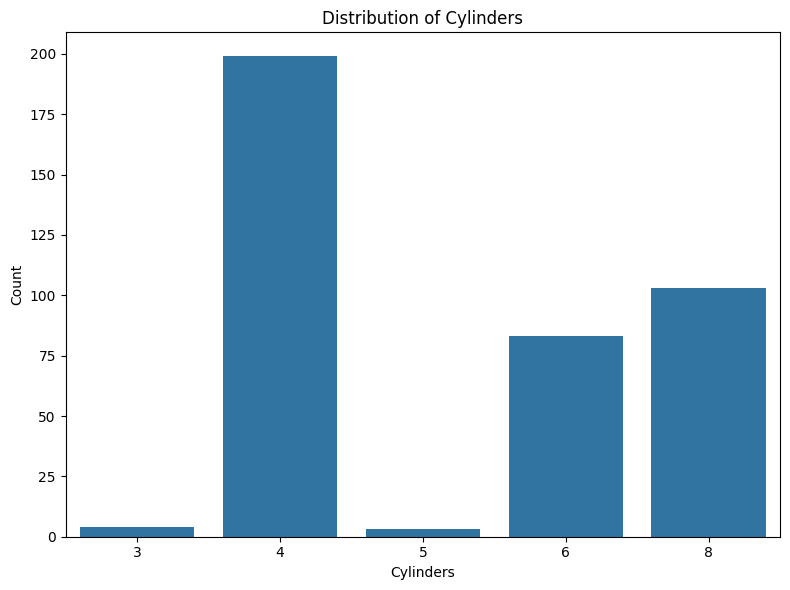

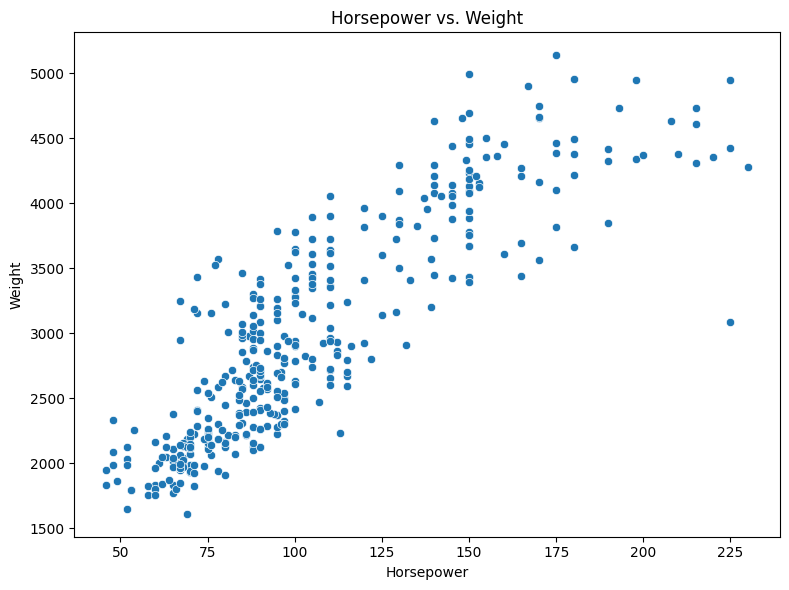

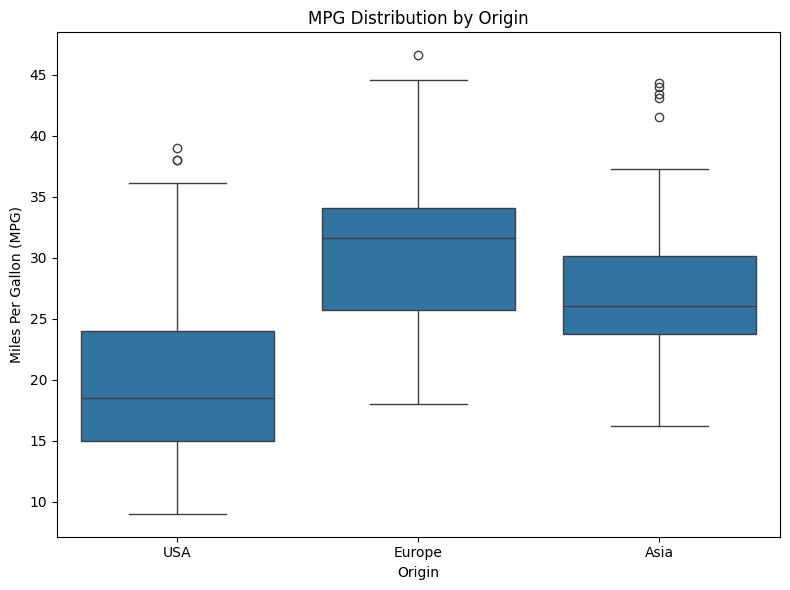


MPG mean by origin:
origin
Asia      27.602941
Europe    30.450633
USA       20.033469
Name: mpg, dtype: float64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
auto_mpg = fetch_ucirepo(id=9)

# Load features and target into a DataFrame
X = auto_mpg.data.features
y = auto_mpg.data.targets

# Combine features and target into one DataFrame
df = pd.concat([X, y], axis=1)

# Display metadata and variables (optional)
print(auto_mpg.metadata)
print(auto_mpg.variables)

# Clean 'horsepower' column
# Replace '?' with NaN and convert to numeric
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Optionally drop rows with missing horsepower
df.dropna(subset=['horsepower'], inplace=True)

# Convert 'origin' codes to region names
origin_map = {1: 'USA', 2: 'Asia', 3: 'Europe'}
df['origin'] = df['origin'].map(origin_map)

# Bar chart of cylinder distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='cylinders', data=df)
plt.title('Distribution of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Scatterplot of horsepower vs weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='weight', data=df)
plt.title('Horsepower vs. Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.tight_layout()
plt.show()

# Extra Question: Does MPG vary by origin?
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('Miles Per Gallon (MPG)')
plt.tight_layout()
plt.show()

# Print summary
print("\nMPG mean by origin:")
print(df.groupby('origin')['mpg'].mean())